In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Import two datesets 
colnames = ["LOAN_ID", "ORIG_CHN", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE","FRST_DTE", "OLTV", 
            "OCLTV", "NUM_BO", "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", "PROP_TYP","NUM_UNIT", "OCC_STAT", 
            "STATE", "ZIP_3", "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", "RELOCATION_FLG"]
Data_A = pd.read_table('D:/1-Intern/Project_1/2018Q1/Acquisition_2018Q1.txt', 
                       sep = '|', header = None, names = colnames)
colnames_P = ["LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
              "Adj.Month.To.Mat", "Maturity.Date", "MSA", "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
              "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", "FCC_COST", "PP_COST", "AR_COST", "IE_COST", "TAX_COST", "NS_PROCS",
              "CE_PROCS", "RMW_PROCS", "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"]
Data_P = pd.read_table('D:/1-Intern/Project_1/2018Q1/Performance_2018Q1.txt', 
                       sep = '|', header = None, names = colnames_P,low_memory=False)

In [3]:
# Convert string into datetime
from datetime import datetime
Data_P['Monthly.Rpt.Prd']= [datetime.strptime(x, '%m/%d/%Y') for x in Data_P.loc[:, 'Monthly.Rpt.Prd']]

In [4]:
Data_P['Delq.Status_D90']= Data_P['Delq.Status'].replace(['1','2','X'], '0')

In [5]:
Data_P['Delq.Status_D90'] = Data_P['Delq.Status_D90'].replace(['3','4','5','6','7','8','9','10','11','12',
                                                     '13','14','15','16','17','18','19','20','21','22'], '1')

In [6]:
Data_P['Delq.Status_D90'].value_counts()

0    9318346
1      13567
Name: Delq.Status_D90, dtype: int64

In [11]:
# Data_P['Delq.Status_D90'] is object datatype, so it should be converted to integer. 
Data_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332050 entries, 0 to 9332049
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   LOAN_ID              int64         
 1   Monthly.Rpt.Prd      datetime64[ns]
 2   Servicer.Name        object        
 3   LAST_RT              float64       
 4   LAST_UPB             float64       
 5   Loan.Age             int64         
 6   Months.To.Legal.Mat  int64         
 7   Adj.Month.To.Mat     float64       
 8   Maturity.Date        object        
 9   MSA                  int64         
 10  Delq.Status          object        
 11  MOD_FLAG             object        
 12  Zero.Bal.Code        float64       
 13  ZB_DTE               object        
 14  LPI_DTE              object        
 15  FCC_DTE              object        
 16  DISP_DT              object        
 17  FCC_COST             float64       
 18  PP_COST              float64       
 19  AR_COST              

In [7]:
Data_P['Delq.Status_D90']=pd.to_numeric(Data_P['Delq.Status_D90'])

In [8]:
Flag_90 = Data_P['Delq.Status_D90'].groupby(Data_P['LOAN_ID']).sum()

In [9]:
Flag_90 = pd.DataFrame(Flag_90)
Flag_90.head 

<bound method NDFrame.head of               Delq.Status_D90
LOAN_ID                      
100001040173              0.0
100002370993              0.0
100005405807              0.0
100008071646              0.0
100010739040              0.0
...                       ...
999991303485              0.0
999992661330              0.0
999995056050              0.0
999997685206              0.0
999998783494              0.0

[426206 rows x 1 columns]>

In [10]:
Flag_90 = Flag_90.reset_index()

In [11]:
Flag_90.head

<bound method NDFrame.head of              LOAN_ID  Delq.Status_D90
0       100001040173              0.0
1       100002370993              0.0
2       100005405807              0.0
3       100008071646              0.0
4       100010739040              0.0
...              ...              ...
426201  999991303485              0.0
426202  999992661330              0.0
426203  999995056050              0.0
426204  999997685206              0.0
426205  999998783494              0.0

[426206 rows x 2 columns]>

In [12]:
Flag_90['Delq.Status_D90'].value_counts()

0.0     423359
1.0        636
2.0        374
4.0        337
3.0        283
5.0        265
6.0        206
8.0        162
7.0        151
9.0        104
11.0        75
10.0        74
12.0        45
13.0        40
14.0        25
16.0        20
15.0        20
18.0        13
17.0        10
20.0         4
19.0         3
Name: Delq.Status_D90, dtype: int64

In [13]:
Flag_90['Delq.Status_D90']= Flag_90.loc[:,'Delq.Status_D90'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 1)

In [14]:
Flag_90['Delq.Status_D90'].value_counts()

0.0    423359
1.0      2847
Name: Delq.Status_D90, dtype: int64

In [15]:
df = pd.merge(Data_A, Flag_90, on = 'LOAN_ID')

In [21]:
df.to_csv(r'D:\1-Intern\Data\2018\Flag_90_2018')

In [15]:
#Date exploration - Predictor Variables
## 1: usually 'Seller.Name' is not related to model, so drop it.
df = df.drop(columns = 'Seller.Name')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426206 entries, 0 to 426205
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LOAN_ID          426206 non-null  int64  
 1   ORIG_CHN         426206 non-null  object 
 2   ORIG_RT          426206 non-null  float64
 3   ORIG_AMT         426206 non-null  int64  
 4   ORIG_TRM         426206 non-null  int64  
 5   ORIG_DTE         426206 non-null  object 
 6   FRST_DTE         426206 non-null  object 
 7   OLTV             426206 non-null  int64  
 8   OCLTV            426205 non-null  float64
 9   NUM_BO           426206 non-null  int64  
 10  DTI              426095 non-null  float64
 11  CSCORE_B         425870 non-null  float64
 12  FTHB_FLG         426206 non-null  object 
 13  PURPOSE          426206 non-null  object 
 14  PROP_TYP         426206 non-null  object 
 15  NUM_UNIT         426206 non-null  int64  
 16  OCC_STAT         426206 non-null  obje

In [35]:
# Browse dataset
df.head(10)

,LOAN_ID,ORIG_CHN,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,NUM_BO,...,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product.Type,CSCORE_C,MI_TYPE,RELOCATION_FLG,Delq.Status_D90
0,100001040173,R,4.250,453000,360,01/2018,03/2018,65,65.0,1,...,1,P,OH,430,NaN,FRM,NaN,NaN,N,0.0
1,100002370993,C,4.250,266000,360,01/2018,03/2018,80,80.0,2,...,1,P,IN,467,NaN,FRM,793.0,NaN,N,0.0
2,100005405807,R,3.990,233000,360,12/2017,01/2018,79,79.0,2,...,1,P,CA,936,NaN,FRM,665.0,NaN,N,0.0
3,100008071646,R,4.250,184000,360,01/2018,03/2018,80,80.0,1,...,1,P,FL,336,NaN,FRM,NaN,NaN,N,0.0
4,100010739040,R,4.250,242000,360,02/2018,04/2018,49,49.0,1,...,1,P,CA,906,NaN,FRM,NaN,NaN,N,0.0
5,100012691523,R,5.375,180000,360,01/2018,03/2018,80,80.0,1,...,1,P,OK,730,NaN,FRM,NaN,NaN,N,0.0
6,100020244091,R,4.875,140000,360,01/2018,03/2018,39,39.0,2,...,1,P,PA,189,NaN,FRM,782.0,NaN,N,0.0
7,100020295408,R,4.875,150000,360,02/2018,04/2018,69,69.0,1,...,1,P,TX,750,NaN,FRM,NaN,NaN,N,0.0
8,100021639708,R,3.990,227000,360,01/2018,03/2018,80,80.0,1,...,1,P,CO,809,NaN,FRM,NaN,NaN,N,0.0
9,100022479643,C,4.000,200000,360,11/2017,01/2018,80,80.0,1,...,1,P,MD,210,NaN,FRM,NaN,NaN,N,0.0


In [36]:
#Show summary stat
df.describe()

,LOAN_ID,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,NUM_UNIT,ZIP_3,MI_PCT,CSCORE_C,MI_TYPE,Delq.Status_D90
count,4.262060e+05,426206.000000,4.262060e+05,426206.000000,426206.000000,426205.000000,426206.000000,426095.000000,425870.000000,426206.000000,426206.000000,114100.000000,190783.000000,114100.000000,426206.000000
mean,5.493219e+11,4.238443,2.333843e+05,325.526931,73.791671,74.266161,1.459100,36.268015,747.287456,1.032867,571.333658,24.472287,754.640225,1.113874,0.006680
std,2.597092e+11,0.466205,1.233285e+05,68.751308,17.309711,17.453830,0.521205,9.613616,47.840870,0.241871,299.502061,6.857250,45.866703,0.317659,0.081457
min,1.000010e+11,2.500000,1.000000e+04,60.000000,3.000000,3.000000,1.000000,1.000000,620.000000,1.000000,6.000000,6.000000,620.000000,1.000000,0.000000
25%,3.241691e+11,3.875000,1.390000e+05,360.000000,65.000000,65.000000,1.000000,29.000000,713.000000,1.000000,314.000000,25.000000,724.000000,1.000000,0.000000
50%,5.491542e+11,4.250000,2.100000e+05,360.000000,78.000000,79.000000,1.000000,38.000000,756.000000,1.000000,596.000000,25.000000,765.000000,1.000000,0.000000
75%,7.745372e+11,4.500000,3.070000e+05,360.000000,85.000000,86.000000,2.000000,44.000000,788.000000,1.000000,852.000000,30.000000,792.000000,1.000000,0.000000
max,9.999988e+11,6.250000,1.307000e+06,360.000000,97.000000,113.000000,6.000000,51.000000,835.000000,4.000000,999.000000,41.000000,837.000000,2.000000,1.000000


In [37]:
# Count missing values by column 
df.isnull().sum()

LOAN_ID                 0
ORIG_CHN                0
ORIG_RT                 0
ORIG_AMT                0
ORIG_TRM                0
ORIG_DTE                0
FRST_DTE                0
OLTV                    0
OCLTV                   1
NUM_BO                  0
DTI                   111
CSCORE_B              336
FTHB_FLG                0
PURPOSE                 0
PROP_TYP                0
NUM_UNIT                0
OCC_STAT                0
STATE                   0
ZIP_3                   0
MI_PCT             312106
Product.Type            0
CSCORE_C           235423
MI_TYPE            312106
RELOCATION_FLG          0
Delq.Status_D90         0
dtype: int64

In [38]:
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'ORIG_DTE',
       'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'FTHB_FLG',
       'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE', 'ZIP_3',
       'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE', 'RELOCATION_FLG',
       'Delq.Status_D90'],
      dtype='object')

In [16]:
# Explore Data 
## Numeric Variables
continous_cols = ['ORIG_RT', 'ORIG_AMT','OLTV','OCLTV', 'CSCORE_B', 'CSCORE_C','NUM_UNIT' ]


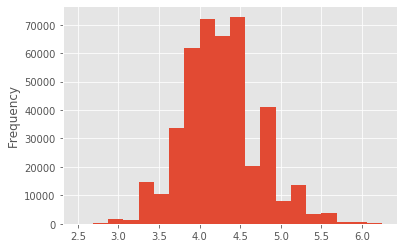

In [41]:
df['ORIG_RT'].plot.hist(bins=20)

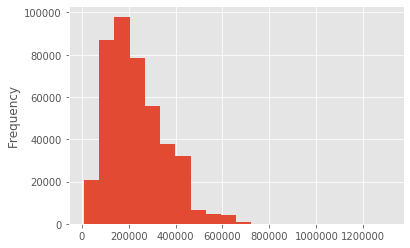

In [43]:
df['ORIG_AMT'].plot.hist(bins=20)

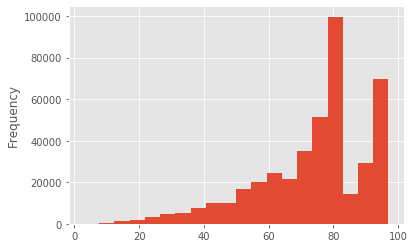

In [44]:
#From below two plots, we know there is high corelated between OLTV and OCLTV due to similar distribution
df['OLTV'].plot.hist(bins=20)

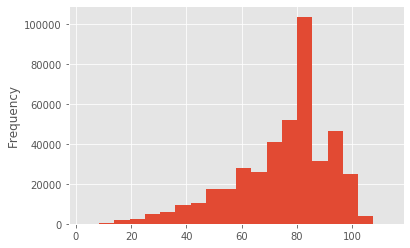

In [45]:
df['OCLTV'].plot.hist(bins=20)

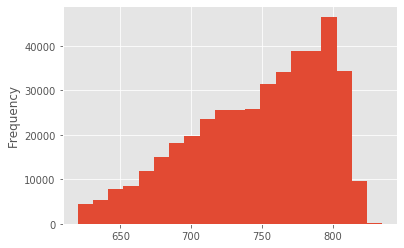

In [46]:
#From below two plot, we also could conclude that 'CSCORE_B' and 'CSCORE_C' have similar distribution 
df['CSCORE_B'].plot.hist(bins=20)

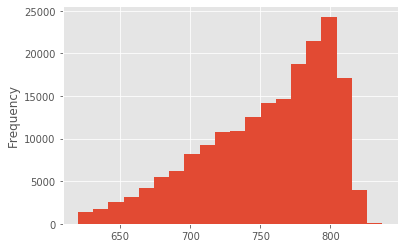

In [47]:
df['CSCORE_C'].plot.hist(bins=20)

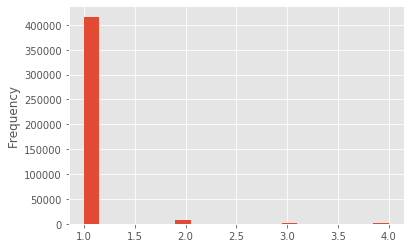

In [48]:
df['NUM_UNIT'].plot.hist(bins=20)

In [34]:
df['NUM_UNIT'] = df['NUM_UNIT'].apply(lambda x: '1' if x == 1 else '2+')

In [35]:
df['NUM_BO']=df['NUM_BO'].apply(lambda x: '1' if x == 1 else '2+')

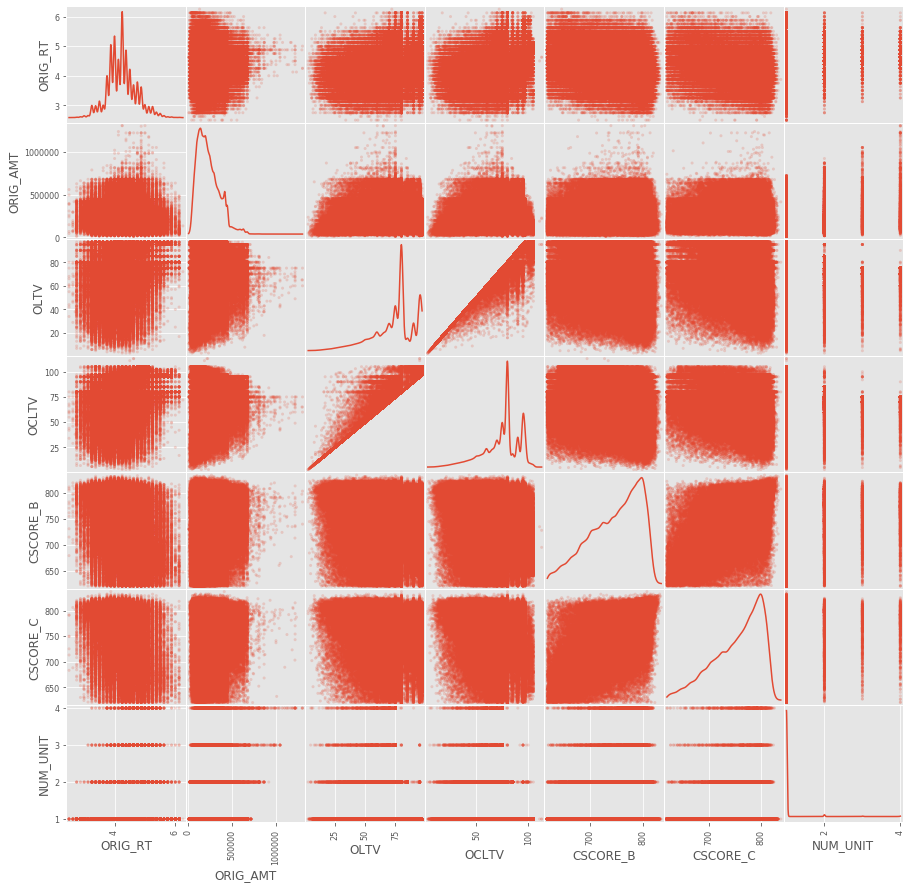

In [54]:
# Use scatter_matrix from Pandas
## From below scatter_matrix, we could know that there is a linear relationship between 'OLTV' and 'OCLTV'
from pandas.plotting import scatter_matrix
scatter_matrix(df[['ORIG_RT', 'ORIG_AMT','OLTV','OCLTV', 'CSCORE_B', 'CSCORE_C','NUM_UNIT']],
               alpha = 0.2, figsize=(15,15), diagonal = 'kde')
plt.show()

In [ ]:
# Categorical Variables

In [17]:
# Due to the large number of missing in  'MI_PCT','MI_TYPE',
categorical_col = ['ORIG_CHN', 'FTHB_FLG','PURPOSE','PROP_TYP','OCC_STAT','Product.Type','RELOCATION_FLG']

In [21]:
df['ORIG_CHN'].value_counts()

R    240940
C    146335
B     38931
Name: ORIG_CHN, dtype: int64

In [56]:
#Since there is one loan of FTHB_FLG is unknow, so it is better to drop this loan 
df['FTHB_FLG'].value_counts()


N    333461
Y     92744
U         1
Name: FTHB_FLG, dtype: int64

In [22]:
df.drop(df[df['FTHB_FLG']== 'U'].index, inplace=True)

In [23]:
df['FTHB_FLG'].value_counts()

N    333461
Y     92744
Name: FTHB_FLG, dtype: int64

In [24]:
df['PURPOSE'].value_counts()

P    219527
C    122895
R     83783
Name: PURPOSE, dtype: int64

In [58]:
df['PROP_TYP'].value_counts()

SF    264515
PU    115815
CO     40260
MH      3816
CP      1800
Name: PROP_TYP, dtype: int64

In [59]:
df['OCC_STAT'].value_counts()

P    372432
I     35734
S     18040
Name: OCC_STAT, dtype: int64

In [60]:
#There is only one categories in this variable, so it is not useful variable and won't be selected as a feature. 
df['Product.Type'].value_counts()

FRM    426206
Name: Product.Type, dtype: int64

In [61]:
df['RELOCATION_FLG'].value_counts()

N    423549
Y      2657
Name: RELOCATION_FLG, dtype: int64

In [25]:
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'ORIG_DTE',
       'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'FTHB_FLG',
       'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE', 'ZIP_3',
       'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE', 'RELOCATION_FLG',
       'Delq.Status_D90'],
      dtype='object')

In [23]:
# In mortgage loan analysis, the minimum score of 'CSCORE_B','CSCORE_C' would be adopted in the model 
df['Credit_Score']= df[['CSCORE_B','CSCORE_C']].min(axis =1 )

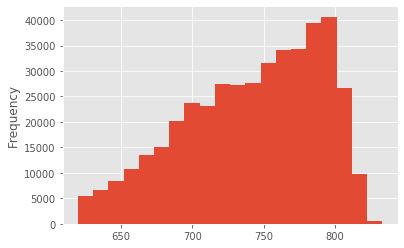

In [78]:
df['Credit_Score'].plot.hist(bins=20)

In [80]:
df[['Credit_Score','CSCORE_B','CSCORE_C']] .head

<bound method NDFrame.head of         Credit_Score  CSCORE_B  CSCORE_C
0              791.0     791.0       NaN
1              736.0     736.0     793.0
2              665.0     696.0     665.0
3              767.0     767.0       NaN
4              727.0     727.0       NaN
...              ...       ...       ...
426201         722.0     753.0     722.0
426202         747.0     747.0       NaN
426203         731.0     731.0       NaN
426204         767.0     774.0     767.0
426205         726.0     776.0     726.0

[426205 rows x 3 columns]>

## Start to build model and creat a list to store the model for furfuther comparision and understand which model of performance is best 

### Define Features and Target
### After preliminary analysis, we could temporarily select features 

In [144]:
Selected_Features = ['ORIG_RT', 'ORIG_AMT', 'OLTV', 'NUM_BO', 'DTI', 'Credit_Score', 'NUM_UNIT',
                    'ORIG_CHN', 'FTHB_FLG','PURPOSE', 'PROP_TYP', 'OCC_STAT', 'RELOCATION_FLG']
X = df[Selected_Features]                     
y = df.loc[:,'Delq.Status_D90'].astype(int)

In [145]:
X= pd.get_dummies(X,columns= [ 'ORIG_CHN', 'FTHB_FLG','PURPOSE','PROP_TYP','OCC_STAT','RELOCATION_FLG','NUM_UNIT','NUM_BO']) 

In [146]:
# Clean Data - deal with missing values
X.isnull().sum()

ORIG_RT             0
ORIG_AMT            0
OLTV                0
DTI                 0
Credit_Score        0
ORIG_CHN_B          0
ORIG_CHN_C          0
ORIG_CHN_R          0
FTHB_FLG_N          0
FTHB_FLG_Y          0
PURPOSE_C           0
PURPOSE_P           0
PURPOSE_R           0
PROP_TYP_CO         0
PROP_TYP_CP         0
PROP_TYP_MH         0
PROP_TYP_PU         0
PROP_TYP_SF         0
OCC_STAT_I          0
OCC_STAT_P          0
OCC_STAT_S          0
RELOCATION_FLG_N    0
RELOCATION_FLG_Y    0
NUM_UNIT_1          0
NUM_UNIT_2+         0
NUM_BO_1            0
NUM_BO_2+           0
dtype: int64

In [28]:
# fill missing values with median
df['DTI']=df['DTI'].fillna(df['DTI'].median())
df['Credit_Score']=df['Credit_Score'].fillna(df['Credit_Score'].median())

In [147]:
from sklearn.model_selection import train_test_split, GridSearchCV
df.reset_index(inplace=True, drop = True)
model_list = {} #to store the models

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

## Build Logistic Regression Model

In [153]:
%%time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


param_grid = {'C': [0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model = LogisticRegression(**grid.best_params_)
logit_model.fit(X_train, y_train)
model_list['logit_model'] = logit_model

{'C': 0.01}
Wall time: 12.9 s


### Random Forest

In [155]:
%%time
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [2,4,6,8], "n_estimators": [100,200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train, y_train)
model_list['rf_model'] = rf_model

{'max_depth': 8, 'n_estimators': 300}
Wall time: 20min 21s


### SVM

In [156]:
%%time
from sklearn import svm
from sklearn.svm import SVC  
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01]}
grid = GridSearchCV(SVC(probability=True),param_grid, cv = 3, refit=True,verbose=2)
grid.fit(X_train,y_train)
print("best hyperparameters through grid search: ", grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
svm_model = SVC(**grid.best_params_, probability=True)
svm_model.fit(X_train, y_train)
model_list['svm_model'] = svm_model

## xgboost

In [157]:
%%time
from xgboost import XGBClassifier
param_grid = {"learning_rate": [0.01, 0.1,0.5], "n_estimators": [100,300,500], 'max_depth':[3,4,5]}
grid = GridSearchCV(XGBClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print("best hyperparameters through grid search: ", grid.best_params_)
xgb_model = XGBClassifier(**grid.best_params_)
xgb_model.fit(X_train, y_train)
model_list['xgb_model'] = xgb_model

ModuleNotFoundError: No module named 'xgboost'